In [ ]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df = pd.read_csv("Travel.csv")
df.head()
# | CustomerID | ProdTaken | Age | TypeofContact    | CityTier  | DurationOfPitch  |    Occupation    | Gender | NumberOfPersonVisiting  | NumberOfFollowups  | ProductPitched | PreferredPropertyStar  | MaritalStatus  | NumberOfTrips  | Passport | PitchSatisfactionScore   | OwnCar | NumberOfChildrenVisiting   | Designation  | MonthlyIncome |
# |------------|-----------|-----|------------------|-----------|------------------|------------------|--------|-------------------------|--------------------|----------------|------------------------|----------------|----------------|----------|--------------------------|--------|----------------------------|--------------|----------------|
# |   200000   |     1     |  41 | Self Enquiry     |     3     |         6        |    Salaried      | Female |            3            |         3          |    Deluxe      |           3            |    Single      |       1        |    1     |             2            |   1    |             0              |   Manager    |     20993      |
# |   200001   |     0     |  49 | Company Invited  |     1     |        14        |    Salaried      |  Male  |            3            |         4          |    Deluxe      |           4            |   Divorced     |       2        |    0     |             3            |   1    |             2              |   Manager    |     20130      |
# |   200002   |     1     |  37 | Self Enquiry     |     1     |         8        |   Free Lancer    |  Male  |            3            |         4          |     Basic      |           3            |    Single      |       7        |    1     |             3            |   0    |             0              |  Executive   |     17090      |
# |   200003   |     0     |  33 | Company Invited  |     1     |         9        |    Salaried      | Female |            2            |         3          |     Basic      |           3            |   Divorced     |       2        |    1     |             5            |   1    |             1              |  Executive   |     17909      |
# |   200004   |     0     | NaN | Self Enquiry     |     1     |         8        | Small Business   |  Male  |            2            |         3          |     Basic      |           4            |   Divorced     |       1        |    0     |           NaN            |  NaN   |           NaN              |     NaN      |      NaN       |

#Checking missing value
df.isnull().sum()
# CustomerID                   0
#  ProdTaken                   0
#  Age                         0
#  TypeofContact               0
#  CityTier                    0
#  DurationOfPitch             0
#  Occupation                  0
#  Gender                      0
#  NumberOfPersonVisiting      0
#  NumberOfFollowups           0
#  ProductPitched              0
#  PreferredPropertyStar       0
#  MaritalStatus               0
#  NumberOfTrips               0
#  Passport                    0
#  PitchSatisfactionScore      0
#  OwnCar                      0
#  NumberOfChildrenVisiting    0
#  Designation                 0
#  MonthlyIncome               0
# dtype: int64


# # Checking unique values for each column 
print(df.columns.tolist()) # ['CustomerID', ' ProdTaken', ' Age', ' TypeofContact  ', ' CityTier', ' DurationOfPitch', ' Occupation    ', ' Gender ', ' NumberOfPersonVisiting', ' NumberOfFollowups', ' ProductPitched', ' PreferredPropertyStar', ' MaritalStatus', ' NumberOfTrips', ' Passport', ' PitchSatisfactionScore', ' OwnCar', ' NumberOfChildrenVisiting', ' Designation   ', ' MonthlyIncome']
df['CustomerID'].unique() #array([200000, 200001, 200002, ..., 204885, 204886, 204887], dtype=int64)
df[' ProdTaken'].unique() # array([1, 0], dtype=int64)
df[' Age'].unique() 
# array(['  41', '  49', '  37', '  33', '    ', '  32', '  59', '  30',
#        '  38', '  36', '  35', '  31', '  34', '  28', '  29', '  22',
#        '  53', '  21', '  42', '  44', '  46', '  39', '  24', '  43',
#        '  50', '  27', '  26', '  48', '  55', '  45', '  56', '  23',
#        '  51', '  40', '  54', '  58', '  20', '  25', '  19', '  57',
#        '  52', '  47', '  18', '  60', '  61'], dtype=object)
df[' TypeofContact  '].unique() # array([' Self Enquiry   ', ' Company Invited', '                '],dtype=object)
df[' CityTier'].unique() # array([3, 1, 2], dtype=int64)
df[' Occupation    '].unique() # array([' Salaried      ', ' Free Lancer   ', ' Small Business',' Large Business'], dtype=object)
df[' Gender '].unique() # array([' Female ', ' Male   ', ' Fe Male'], dtype=object)
df[' ProductPitched'].unique() # array([' Deluxe        ', ' Basic         ', ' Standard      ',' Super Deluxe  ', ' King          '], dtype=object)
df[' MaritalStatus'].unique()# array([' Single       ', ' Divorced     ', ' Married      ',' Unmarried    '], dtype=object)
df[' Designation   '].unique()# array([' Manager       ', ' Executive     ', ' Senior Manager',' AVP           ', ' VP            '], dtype=object)

df.info()
 #   Column                     Non-Null Count  Dtype 
# ---  ------                     --------------  ----- 
#  0   CustomerID                 4888 non-null   int64 
#  1    ProdTaken                 4888 non-null   int64 
#  2    Age                       4888 non-null   object
#  3    TypeofContact             4888 non-null   object
#  4    CityTier                  4888 non-null   int64 
#  5    DurationOfPitch           4888 non-null   object
#  6    Occupation                4888 non-null   object
#  7    Gender                    4888 non-null   object
#  8    NumberOfPersonVisiting    4888 non-null   int64 
#  9    NumberOfFollowups         4888 non-null   object
#  10   ProductPitched            4888 non-null   object
#  11   PreferredPropertyStar     4888 non-null   object
#  12   MaritalStatus             4888 non-null   object
#  13   NumberOfTrips             4888 non-null   object
#  14   Passport                  4888 non-null   int64 
#  15   PitchSatisfactionScore    4888 non-null   int64 
#  16   OwnCar                    4888 non-null   int64 
#  17   NumberOfChildrenVisiting  4888 non-null   object
#  18   Designation               4888 non-null   object
#  19   MonthlyIncome             4888 non-null   object

# Forcefully strip column names again and overwrite
df.columns = [col.strip() for col in df.columns]

# Now check column names
print(df.columns.tolist())
# ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']

# 🔁 Step 2: Convert numeric columns again
# Define clean column names again
numeric_cols = [
    'Age', 'DurationOfPitch', 'NumberOfFollowups',
    'PreferredPropertyStar', 'NumberOfTrips',
    'NumberOfChildrenVisiting', 'MonthlyIncome'
]

# Convert to numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numeric_cols].dtypes)
# Age                         float64
# DurationOfPitch             float64
# NumberOfFollowups           float64
# PreferredPropertyStar       float64
# NumberOfTrips               float64
# NumberOfChildrenVisiting    float64
# MonthlyIncome               float64
# dtype: object

# Step 2: Handle Missing Values (you can change strategy as needed)
# Fill NaN with median for each numeric column
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# ✅ Verify that no missing values remain in numeric columns
print(df[numeric_cols].isnull().sum())
# Age                         0
# DurationOfPitch             0
# NumberOfFollowups           0
# PreferredPropertyStar       0
# NumberOfTrips               0
# NumberOfChildrenVisiting    0
# MonthlyIncome               0
# dtype: int64

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Standardize text: strip whitespace and convert to lowercase
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Optional: Manual corrections for known issues (example: fix gender typos)
df['Gender'] = df['Gender'].replace({
    'fe male': 'female',  # fixing inconsistent gender
    'male': 'male',
    'female': 'female'
})

# Check unique values for review
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# TypeofContact: ['self enquiry' 'company invited' '']
# Occupation: ['salaried' 'free lancer' 'small business' 'large business']
# Gender: ['female' 'male']
# ProductPitched: ['deluxe' 'basic' 'standard' 'super deluxe' 'king']
# MaritalStatus: ['single' 'divorced' 'married' 'unmarried']
# Designation: ['manager' 'executive' 'senior manager' 'avp' 'vp']

from sklearn.preprocessing import LabelEncoder

# Re-identify cleaned categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# review unique values before encoding
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")
# TypeofContact: ['self enquiry' 'company invited' '']
# Occupation: ['salaried' 'free lancer' 'small business' 'large business']
# Gender: ['female' 'male']
# ProductPitched: ['deluxe' 'basic' 'standard' 'super deluxe' 'king']
# MaritalStatus: ['single' 'divorced' 'married' 'unmarried']
# Designation: ['manager' 'executive' 'senior manager' 'avp' 'vp']

# 🔵 Strategy 1: Label Encoding for Binary Columns
le = LabelEncoder()

binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])
# 🔷 Strategy 2: One-Hot Encoding for Others
multi_cat_cols = [col for col in categorical_cols if df[col].nunique() > 2]

# Perform one-hot encoding
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print(df.shape)
print(df.head())

# Step 5: (Optional) Create New Features
# Example: Binary income level
df['HighIncome'] = (df['MonthlyIncome'] > df['MonthlyIncome'].median()).astype(int)
# Show result
print("✅ Feature engineering complete. Here's the updated DataFrame:")
df.head()
# | CustomerID | ProdTaken | Age  | CityTier | DurationOfPitch | Gender | NumberOfPersonVisiting | NumberOfFollowups | PreferredPropertyStar | NumberOfTrips | ... | ProductPitched_standard  | ProductPitched_super deluxe  | MaritalStatus_married  | MaritalStatus_single  | MaritalStatus_unmarried  | Designation_executive  | Designation_manager  | Designation_senior manager  | Designation_vp  | HighIncome |
# | ---------- | --------- | ---- | -------- | --------------- | ------ | ---------------------- | ----------------- | --------------------- | ------------- | --- | ------------------------ | ---------------------------- | ---------------------- | --------------------- | ------------------------ | ---------------------- | -------------------- | --------------------------- | --------------- | ---------- |
# | 200000     | 1         | 41.0 | 3        | 6.0             | 0      | 3                      | 3.0               | 3.0                   | 1.0           | ... | False                    | False                        | False                  | True                  | False                    | False                  | True                 | False                       | False           | 0          |
# | 200001     | 0         | 49.0 | 1        | 14.0            | 1      | 3                      | 4.0               | 4.0                   | 2.0           | ... | False                    | False                        | False                  | False                 | False                    | False                  | True                 | False                       | False           | 0          |
# | 200002     | 1         | 37.0 | 1        | 8.0             | 1      | 3                      | 4.0               | 3.0                   | 7.0           | ... | False                    | False                        | False                  | True                  | False                    | True                   | False                | False                       | False           | 0          |
# | 200003     | 0         | 33.0 | 1        | 9.0             | 0      | 2                      | 3.0               | 3.0                   | 2.0           | ... | False                    | False                        | False                  | False                 | False                    | True                   | False                | False                       | False           | 0          |
# | 200004     | 0         | 36.0 | 1        | 8.0             | 1      | 2                      | 3.0               | 4.0                   | 1.0           | ... | False                    | False                        | False                  | False                 | False                    | True                   | False                | False                       | False           | 0          |




['CustomerID', ' ProdTaken', ' Age', ' TypeofContact  ', ' CityTier', ' DurationOfPitch', ' Occupation    ', ' Gender ', ' NumberOfPersonVisiting', ' NumberOfFollowups', ' ProductPitched', ' PreferredPropertyStar', ' MaritalStatus', ' NumberOfTrips', ' Passport', ' PitchSatisfactionScore', ' OwnCar', ' NumberOfChildrenVisiting', ' Designation   ', ' MonthlyIncome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CustomerID                 4888 non-null   int64 
 1    ProdTaken                 4888 non-null   int64 
 2    Age                       4888 non-null   object
 3    TypeofContact             4888 non-null   object
 4    CityTier                  4888 non-null   int64 
 5    DurationOfPitch           4888 non-null   object
 6    Occupation                4888 non-null   object
 7    Gender                  

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,...,ProductPitched_standard,ProductPitched_super deluxe,MaritalStatus_married,MaritalStatus_single,MaritalStatus_unmarried,Designation_executive,Designation_manager,Designation_senior manager,Designation_vp,HighIncome
0,200000,1,41.0,3,6.0,0,3,3.0,3.0,1.0,...,False,False,False,True,False,False,True,False,False,0
1,200001,0,49.0,1,14.0,1,3,4.0,4.0,2.0,...,False,False,False,False,False,False,True,False,False,0
2,200002,1,37.0,1,8.0,1,3,4.0,3.0,7.0,...,False,False,False,True,False,True,False,False,False,0
3,200003,0,33.0,1,9.0,0,2,3.0,3.0,2.0,...,False,False,False,False,False,True,False,False,False,0
4,200004,0,36.0,1,8.0,1,2,3.0,4.0,1.0,...,False,False,False,False,False,True,False,False,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     4888 non-null   int64  
 1   Age                            4888 non-null   float64
 2   CityTier                       4888 non-null   int64  
 3   DurationOfPitch                4888 non-null   float64
 4   Gender                         4888 non-null   int32  
 5   NumberOfPersonVisiting         4888 non-null   int64  
 6   NumberOfFollowups              4888 non-null   float64
 7   PreferredPropertyStar          4888 non-null   float64
 8   NumberOfTrips                  4888 non-null   float64
 9   Passport                       4888 non-null   int64  
 10  PitchSatisfactionScore         4888 non-null   int64  
 11  OwnCar                         4888 non-null   int64  
 12  NumberOfChildrenVisiting       4888 non-null   f

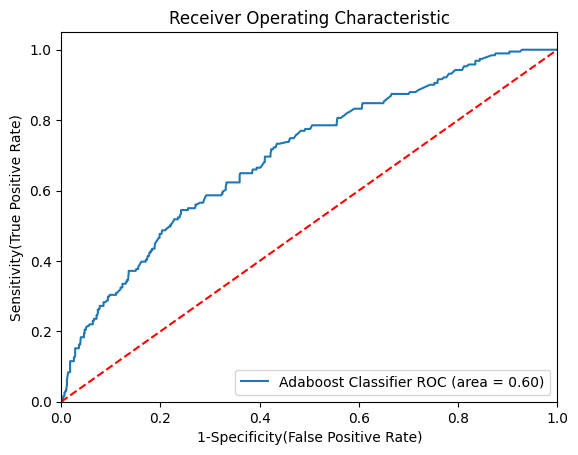

In [73]:
# Train Test Split And Model Training
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

X.head()
# | CustomerID | Age  | CityTier | DurationOfPitch | Gender | NumberOfPersonVisiting | NumberOfFollowups | PreferredPropertyStar | NumberOfTrips | Passport | ... | ProductPitched\_standard | ProductPitched\_super deluxe | MaritalStatus\_married | MaritalStatus\_single | MaritalStatus\_unmarried | Designation\_executive | Designation\_manager | Designation\_senior manager | Designation\_vp | HighIncome |
# | ---------- | ---- | -------- | --------------- | ------ | ---------------------- | ----------------- | --------------------- | ------------- | -------- | --- | ------------------------ | ---------------------------- | ---------------------- | --------------------- | ------------------------ | ---------------------- | -------------------- | --------------------------- | --------------- | ---------- |
# | 200000     | 41.0 | 3        | 6.0             | 0      | 3                      | 3.0               | 3.0                   | 1.0           | 1        | ... | False                    | False                        | False                  | True                  | False                    | False                  | True                 | False                       | False           | 0          |
# | 200001     | 49.0 | 1        | 14.0            | 1      | 3                      | 4.0               | 4.0                   | 2.0           | 0        | ... | False                    | False                        | False                  | False                 | False                    | False                  | True                 | False                       | False           | 0          |
# | 200002     | 37.0 | 1        | 8.0             | 1      | 3                      | 4.0               | 3.0                   | 7.0           | 1        | ... | False                    | False                        | False                  | True                  | False                    | True                   | False                | False                       | False           | 0          |
# | 200003     | 33.0 | 1        | 9.0             | 0      | 2                      | 3.0               | 3.0                   | 2.0           | 1        | ... | False                    | False                        | False                  | False                 | False                    | True                   | False                | False                       | False           | 0          |
# | 200004     | 36.0 | 1        | 8.0             | 1      | 2                      | 3.0               | 4.0                   | 1.0           | 0        | ... | False                    | False                        | False                  | False                 | False                    | True                   | False                | False                       | False           | 0          |

y.head()
# 0    1
# 1    0
# 2    1
# 3    0
# 4    0
# Name: ProdTaken, dtype: int64

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape
# ((3910, 31), (978, 31))

X.info()
 #   Column                         Non-Null Count  Dtype  
# ---  ------                         --------------  -----  
#  0   CustomerID                     4888 non-null   int64  
#  1   Age                            4888 non-null   float64
#  2   CityTier                       4888 non-null   int64  
#  3   DurationOfPitch                4888 non-null   float64
#  4   Gender                         4888 non-null   int32  
#  5   NumberOfPersonVisiting         4888 non-null   int64  
#  6   NumberOfFollowups              4888 non-null   float64
#  7   PreferredPropertyStar          4888 non-null   float64
#  8   NumberOfTrips                  4888 non-null   float64
#  9   Passport                       4888 non-null   int64  
#  10  PitchSatisfactionScore         4888 non-null   int64  
#  11  OwnCar                         4888 non-null   int64  
#  12  NumberOfChildrenVisiting       4888 non-null   float64
#  13  MonthlyIncome                  4888 non-null   float64
#  14  TypeofContact_company invited  4888 non-null   bool   
#  15  TypeofContact_self enquiry     4888 non-null   bool   
#  16  Occupation_large business      4888 non-null   bool   
#  17  Occupation_salaried            4888 non-null   bool   
#  18  Occupation_small business      4888 non-null   bool   
#  19  ProductPitched_deluxe          4888 non-null   bool   
#  20  ProductPitched_king            4888 non-null   bool   
#  21  ProductPitched_standard        4888 non-null   bool   
#  22  ProductPitched_super deluxe    4888 non-null   bool   
#  23  MaritalStatus_married          4888 non-null   bool   
#  24  MaritalStatus_single           4888 non-null   bool   
#  25  MaritalStatus_unmarried        4888 non-null   bool   
#  26  Designation_executive          4888 non-null   bool   
#  27  Designation_manager            4888 non-null   bool   
#  28  Designation_senior manager     4888 non-null   bool   
#  29  Designation_vp                 4888 non-null   bool   
#  30  HighIncome                     4888 non-null   int32 

## applying Trnsformation in training(fit_transform)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit scaler on training data only (important)
X_train = scaler.fit_transform(X_train[numeric_cols])

# Apply transformation on test data
X_test = scaler.transform(X_test[numeric_cols])

X_train.shape,X_test.shape
# ((3910, 7), (978, 7))

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

#     Logisitic Regression
# Model performance for Training set
# - Accuracy: 0.8141
# - F1 score: 0.7354
# - Precision: 0.5500
# - Recall: 0.0151
# - Roc Auc Score: 0.5061
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8047
# - F1 score: 0.7214
# - Precision: 0.5000
# - Recall: 0.0105
# - Roc Auc Score: 0.5040
# Decision Tree
# Model performance for Training set
# - Accuracy: 0.9997
# - F1 score: 0.9997
# - Precision: 0.9986
# - Recall: 1.0000
# - Roc Auc Score: 0.9998
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8569
# - F1 score: 0.8560
# - Precision: 0.6378
# - Recall: 0.6178
# - Roc Auc Score: 0.7663
# Random Forest
# Model performance for Training set
# - Accuracy: 0.9997
# - F1 score: 0.9997
# - Precision: 0.9986
# - Recall: 1.0000
# - Roc Auc Score: 0.9998
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8742
# - F1 score: 0.8554
# - Precision: 0.8778
# - Recall: 0.4136
# - Roc Auc Score: 0.6998
# Gradient Boost
# Model performance for Training set
# - Accuracy: 0.8540
# - F1 score: 0.8189
# - Precision: 0.8798
# - Recall: 0.2510
# - Roc Auc Score: 0.6216
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8231
# - F1 score: 0.7765
# - Precision: 0.6957
# - Recall: 0.1675
# - Roc Auc Score: 0.5749
# Adaboost
# Model performance for Training set
# - Accuracy: 0.8228
# - F1 score: 0.7730
# - Precision: 0.6139
# - Recall: 0.1331
# - Roc Auc Score: 0.5569
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8078
# - F1 score: 0.7501
# - Precision: 0.5429
# - Recall: 0.0995
# - Roc Auc Score: 0.5396

## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

rf_params
# {'max_depth': [5, 8, 15, None, 10],
#  'max_features': [5, 7, 'auto', 8],
#  'min_samples_split': [2, 8, 15, 20],
#  'n_estimators': [100, 200, 500, 1000]}

adaboost_param
# {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("AB", AdaBoostClassifier(), adaboost_param)
                   
                   ]
randomcv_models
# [('RF',
#   RandomForestClassifier(),
#   {'max_depth': [5, 8, 15, None, 10],
#    'max_features': [5, 7, 'auto', 8],
#    'min_samples_split': [2, 8, 15, 20],
#    'n_estimators': [100, 200, 500, 1000]}),
#  ('AB',
#   AdaBoostClassifier(),
#   {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])
# Fitting 3 folds for each of 100 candidates, totalling 300 fits
# Fitting 3 folds for each of 10 candidates, totalling 30 fits
# ---------------- Best Params for RF -------------------
# {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
# ---------------- Best Params for AB -------------------
# {'n_estimators': 90, 'algorithm': 'SAMME'}

models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    "Adaboost":AdaBoostClassifier(n_estimators=80, algorithm='SAMME')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

#     Random Forest
# Model performance for Training set
# - Accuracy: 0.9997
# - F1 score: 0.9997
# - Precision: 0.9986
# - Recall: 1.0000
# - Roc Auc Score: 0.9998
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8916
# - F1 score: 0.8810
# - Precision: 0.8632
# - Recall: 0.5288
# - Roc Auc Score: 0.7542
# ===================================


# Adaboost
# Model performance for Training set
# - Accuracy: 0.8274
# - F1 score: 0.7810
# - Precision: 0.6570
# - Recall: 0.1550
# - Roc Auc Score: 0.5682
# ----------------------------------
# Model performance for Test set
# - Accuracy: 0.8119
# - F1 score: 0.7567
# - Precision: 0.5946
# - Recall: 0.1152
# - Roc Auc Score: 0.5481
# ===================================

## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Adaboost Classifier',
    'model':AdaBoostClassifier(n_estimators=80, algorithm='SAMME'),
    'auc':  0.6049
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 



In [ ]:


# ### 🔍 **1. Data Cleaning and Preparation**

# * Some columns had **extra spaces** or the wrong data type (like numbers stored as text), which were fixed.
# * Missing values in number columns (like age or income) were filled in using the **median**.
# * Categorical data (like gender) was cleaned — for example, `'Fe Male'` was corrected to `'female'`.
# * **Label Encoding** was used for columns with two categories (like gender).
# * **One-Hot Encoding** was used for columns with more than two categories, to make them usable in machine learning models.

# ---

# ### 🧠 **2. How the Models Performed (Before Tuning)**

# * **Random Forest and Decision Tree** did extremely well on training data, but not as well on test data — this usually means they were **overfitting** (memorizing rather than learning).
# * **Random Forest** still did better on test data than Decision Tree.
# * **Logistic Regression**, a simpler model, performed **poorly at finding positive cases** (people who took the product).
# * **Gradient Boost and AdaBoost** models also **struggled to detect positives**, though they were a bit better than Logistic Regression.

# ---

# ### 🛠️ **3. Tuning the Models to Improve Them**

# * You tried different settings (hyperparameters) for Random Forest and AdaBoost to improve performance.

#   * For Random Forest, increasing the number of trees and adjusting how they split improved the results.
#   * For AdaBoost, changing the number of trees and algorithm type made small improvements.

# ---

# ### 📈 **4. Performance After Tuning**

# * **Random Forest** became better at generalizing — it got:

#   * **89% accuracy**, and
#   * **88% F1-score** (a good balance of precision and recall),
#   * But still **missed about half of the actual positive cases**.
# * **AdaBoost** got a small boost but still performed **poorly at finding positives**.

# ---

# ### 📉 **5. ROC AUC Score (How Well Models Separate Classes)**

# * **AdaBoost’s AUC score was 0.60**, which is just slightly better than guessing randomly (0.5).
# * This means **AdaBoost isn’t very reliable** in telling who will or won’t take the product.

# ---

# ### ✅ **Final Takeaway**

# * Data cleaning was done well.
# * **Random Forest** is your best model so far, but it still **misses a lot of people who actually took the product**.
# * **AdaBoost** isn’t performing well and might not be worth using in this case.
# * To improve further, consider:

#   * Checking for **class imbalance** (maybe there are fewer "positive" examples),
#   * Using other models or techniques,
#   * Creating **new features** to help the model learn better.

